In [1]:

#pip install nbformat --upgrade

In [2]:
import nbformat
print(nbformat.__version__)

5.10.4


In [3]:
import numpy as np
import pandas as pd

import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Graficas de los Portatiles
df_portatiles = pd.read_csv('productosPortatil-limpio.csv')
df_portatiles.head()

,producto_id,timestamp,nombre,url,precio,precio_tachado,rating,opiniones,categoria_id
0,1,2025-02-28 08:40:09,Acer TravelMate P2 TMP214-55-TCO-51RL Intel Co...,https://www.pccomponentes.com/acer-travelmate-...,758.98,0.0,4.7,7386,4
1,2,2025-02-28 08:40:24,Portátil Acer TravelMate P2 TMP215-54-584F Int...,https://www.pccomponentes.com/portatil-acer-tr...,728.79,0.0,3.8,271,4
2,3,2025-02-28 08:40:41,Acer TravelMate P2 TMP215-54-71UZ Intel Core i...,https://www.pccomponentes.com/acer-travelmate-...,912.04,0.0,4.7,7386,1
3,4,2025-02-28 08:40:57,Acer TravelMate P2 TMP216-51-TCO-346K Netbook ...,https://www.pccomponentes.com/acer-travelmate-...,769.60,0.0,3.8,271,4
4,5,2025-02-28 08:41:11,Acer TravelMate P2 TMP216-51-TCO-5584 Intel Co...,https://www.pccomponentes.com/acer-travelmate-...,842.33,0.0,0.0,0,4


In [6]:
df_portatiles['categoria_id'].unique()

array([ 4,  1,  2, 10,  9,  6,  8,  5], dtype=int64)

In [7]:
df_portatiles.describe()

,producto_id,precio,precio_tachado,rating,opiniones,categoria_id
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,576.500000,1017.210252,312.660017,3.764323,791.164062,3.300347
std,332.698061,842.969907,671.732723,1.581085,2290.105024,2.518753
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,288.750000,494.000000,0.000000,3.900000,0.000000,1.000000
50%,576.500000,799.000000,0.000000,4.400000,0.000000,2.000000
75%,864.250000,1399.000000,367.490000,4.600000,133.000000,4.000000
max,1152.000000,6098.000000,4899.000000,5.000000,10351.000000,10.000000


In [8]:
df_portatiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   producto_id     1152 non-null   int64  
 1   timestamp       1152 non-null   object 
 2   nombre          1152 non-null   object 
 3   url             1152 non-null   object 
 4   precio          1152 non-null   float64
 5   precio_tachado  1152 non-null   float64
 6   rating          1152 non-null   float64
 7   opiniones       1152 non-null   int64  
 8   categoria_id    1152 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 81.1+ KB


In [9]:
df_portatiles['timestamp'] = pd.to_datetime(df_portatiles['timestamp'])

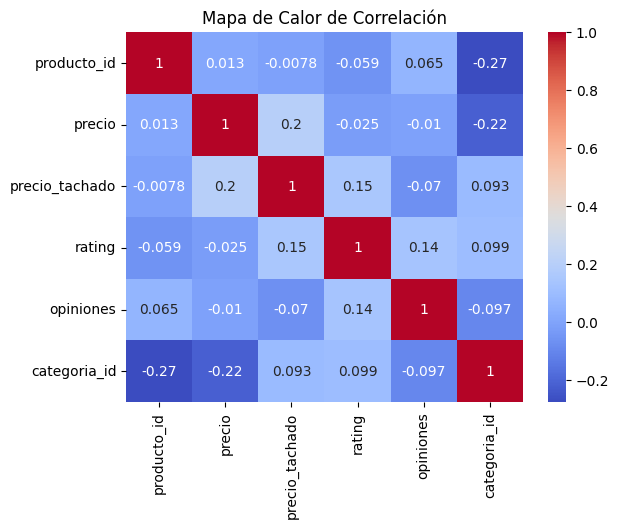

In [10]:
df_numerico = df_portatiles.select_dtypes(include=['number'])

sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [11]:
px.histogram(data_frame = df_portatiles, 
             x          = "precio",
             nbins      = 40)

In [16]:
fig = go.Figure()

for categoria in df_portatiles['categoria_id'].unique():
    df_filtrado = df_portatiles[df_portatiles['categoria_id'] == categoria]
    fig.add_trace(go.Scatter(
        x=df_filtrado['precio'],
        y=df_filtrado['rating'],
        mode='markers',
        name=categoria
    ))

fig.update_layout(
    title='Gráfico de Dispersión por Categoría: Precio - Rating',
    xaxis_title='Precio',
    yaxis_title='Rating',
    template='plotly_dark'
)

fig.show()

ValueError: 
    Invalid value of type 'numpy.int64' received for the 'name' property of scatter
        Received value: 4

    The 'name' property is a string and must be specified as:
      - A string
      - A number that will be converted to a string

In [17]:
fig = go.Figure()

for categoria in df_portatiles['categoria_id'].unique():
    df_filtrado = df_portatiles[df_portatiles['categoria_id'] == categoria]
    fig.add_trace(go.Scatter(
        x=df_filtrado['opiniones'],
        y=df_filtrado['rating'],
        mode='markers',
        name=categoria
    ))

fig.update_layout(
    title='Gráfico de Dispersión por Categoría: Opiniones - Rating',
    xaxis_title='opiniones',
    yaxis_title='Rating',
    template='plotly_dark'
)

fig.show()

ValueError: 
    Invalid value of type 'numpy.int64' received for the 'name' property of scatter
        Received value: 4

    The 'name' property is a string and must be specified as:
      - A string
      - A number that will be converted to a string

In [18]:
df_portatiles['descuento_%'] = (((df_portatiles['precio'] - df_portatiles['precio_tachado']) / df_portatiles['precio']) * 100)*-1
df_portatiles['descuento_%'] = df_portatiles['descuento_%'].round(2)
df_portatiles['descuento_%'] = df_portatiles['descuento_%'].fillna(0)


In [19]:
df_portatiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   producto_id     1152 non-null   int64         
 1   timestamp       1152 non-null   datetime64[ns]
 2   nombre          1152 non-null   object        
 3   url             1152 non-null   object        
 4   precio          1152 non-null   float64       
 5   precio_tachado  1152 non-null   float64       
 6   rating          1152 non-null   float64       
 7   opiniones       1152 non-null   int64         
 8   categoria_id    1152 non-null   int64         
 9   descuento_%     1152 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 90.1+ KB


In [21]:
px.histogram(data_frame = df_portatiles,
             x          = "rating",
             color      = "categoria_id",
             title      = "Histograma de Rating por Categoría",
             template   = "plotly_dark")

In [22]:
px.scatter_3d(data_frame = df_portatiles,
              x          = "precio",
              y          = "rating",
              z          = "opiniones",
              color      = "categoria_id"
              )

In [23]:
px.histogram(data_frame = df_portatiles,
                x          = "descuento_%",
                color      = "categoria_id",
                title      = "Histograma de Descuento por Categoría",
                template   = "plotly_dark")